# Draft figures finally not used in swiss_mix_analysis.ipynb

Errors and missing variables can be ignored as they are defined in the base notebook.

**Make sure to select the right targets in swiss_mix_analysis.ipynb before running this notebook.**

In [ ]:
# Run the base notebook to load all variables
skip_generation = True
%run ../examples/swiss_mix_analysis.ipynb

In [2]:
producing_electricity_impact['sum'] = producing_electricity_impact.sum(axis=1)

## 1.

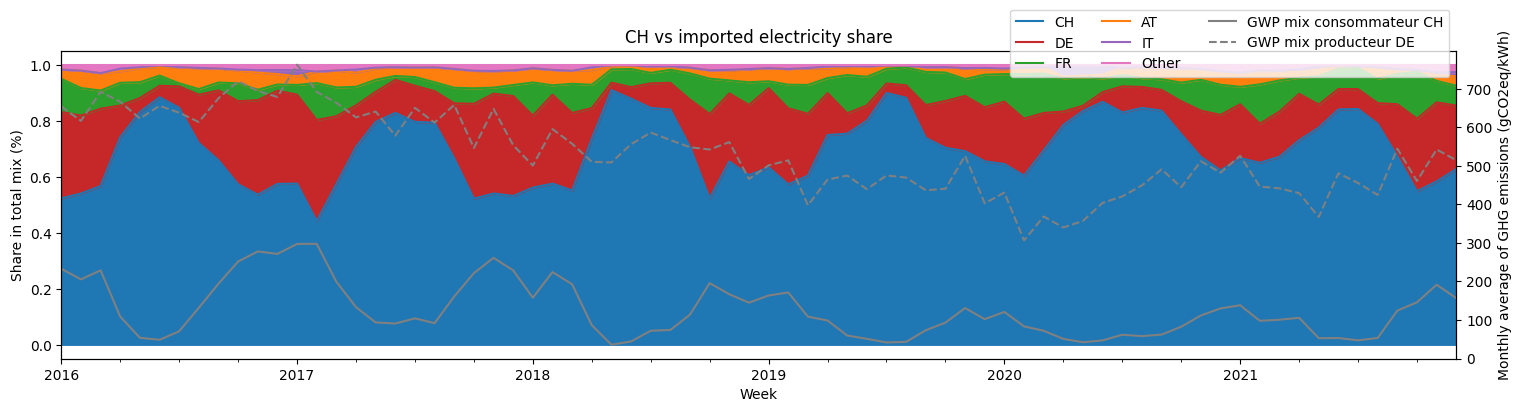

In [3]:
fig, ax1 = plt.subplots(1, 1, figsize=(18, 4))
ax1.set_title("CH vs imported electricity share")
importations = electricity_mix['df'].drop(['sum'], axis=1)
#importations['imported'] = importations.sum(axis=1)
#importations['CH'] = electricity_mix['df']['CH']
importations = importations.resample('M').mean()
importations[ordered_countries].plot.area(ax=ax1, color=ordered_colors, legend=False)
ax1.set_xlabel('Week')
ax1.set_ylabel('Share in total mix (%)')

ax2 = ax1.twinx()
ch_consumer_impact = (electricity_impact['df']['sum']).resample('M').mean()  # convert kgCO2eq/kWh -> gCO2eq/kWh
ch_consumer_impact.plot(ax=ax2, linestyle='-', color=[colormap['sum']])
de_producing_impact = (producing_electricity_impact['DE']).resample('M').mean()  # convert kgCO2eq/kWh -> gCO2eq/kWh
de_producing_impact.plot(ax=ax2, linestyle='--', color=[colormap['sum']])
ax2.set_ylabel('Monthly average of GHG emissions (gCO2eq/kWh)')

fig.legend(np.concatenate([ax1.get_lines(), ax2.get_lines()]),
           np.concatenate([ax1.get_legend_handles_labels()[1], ['GWP mix consommateur CH', 'GWP mix producteur DE']]),
           loc='upper right', ncol=3, bbox_to_anchor=(0.9, 1));

Zoom sur la décomposition des sources de l'éléctricité en Suisse
- Sources locales et import (6 principales)
- Sources locales (6 principales)

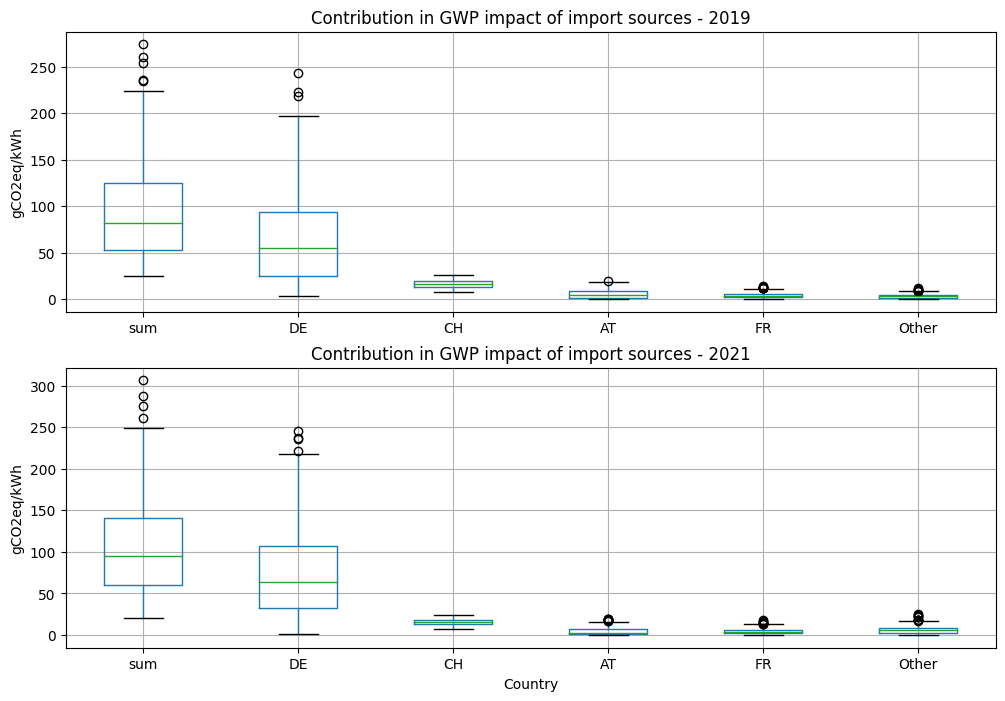

In [4]:
# import sources
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
data = electricity_impact['df'].astype('float32').resample('D').mean()
#data = data.drop(data.loc[:, [not 'Mix' in k for k in data.columns]], axis=1)
local_impact = data.loc[pd.date_range('2019-01-01', '2019-12-31')]
local_cols = local_impact.mean().nlargest(6).index.tolist()
local_impact[local_cols].boxplot(ax=ax[0])
ax[0].set_title('Contribution in GWP impact of import sources - 2019')
ax[0].set_ylabel('gCO2eq/kWh')
local_impact = data.loc[pd.date_range('2021-01-01', '2021-12-31')]
local_impact[local_cols].boxplot(ax=ax[1])
ax[1].set_title('Contribution in GWP impact of import sources - 2021')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('gCO2eq/kWh');

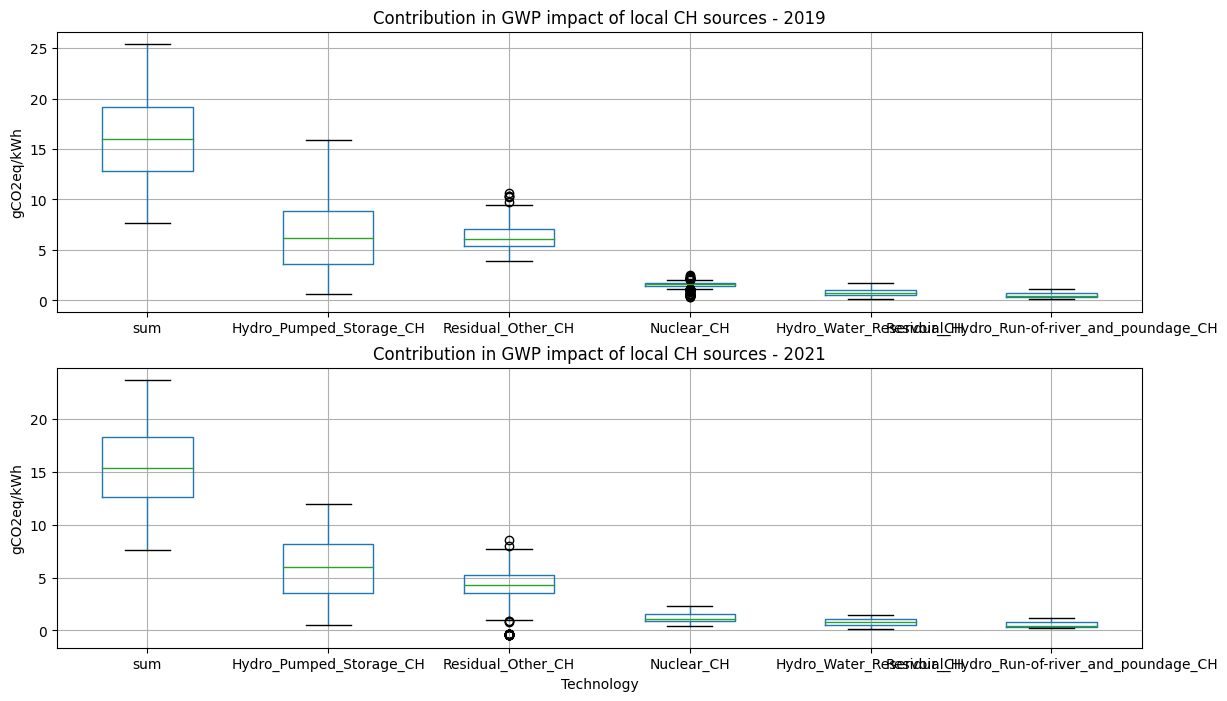

In [5]:
# local sources
fig, ax = plt.subplots(2, 1, figsize=(14, 8))
data = electricity_impact['raw_df'].astype('float32').resample('D').mean()
data = data.drop(data.loc[:, [not k.endswith('CH') or 'Mix' in k for k in data.columns]], axis=1)
data['sum'] = data.sum(axis=1)
local_impact = data.loc[pd.date_range('2019-01-01', '2019-12-31')]
local_cols = local_impact.mean().nlargest(6).index.tolist()
local_impact[local_cols].boxplot(ax=ax[0])
ax[0].set_title('Contribution in GWP impact of local CH sources - 2019')
ax[0].set_ylabel('gCO2eq/kWh')
local_impact = data.loc[pd.date_range('2021-01-01', '2021-12-31')]
local_impact[local_cols].boxplot(ax=ax[1])
ax[1].set_title('Contribution in GWP impact of local CH sources - 2021')
ax[1].set_xlabel('Technology')
ax[1].set_ylabel('gCO2eq/kWh');

Suite

ValueError: When stacked is True, each column must be either all positive or all negative. Column 'Residual_Hydro_Water_Reservoir_CH' contains both positive and negative values

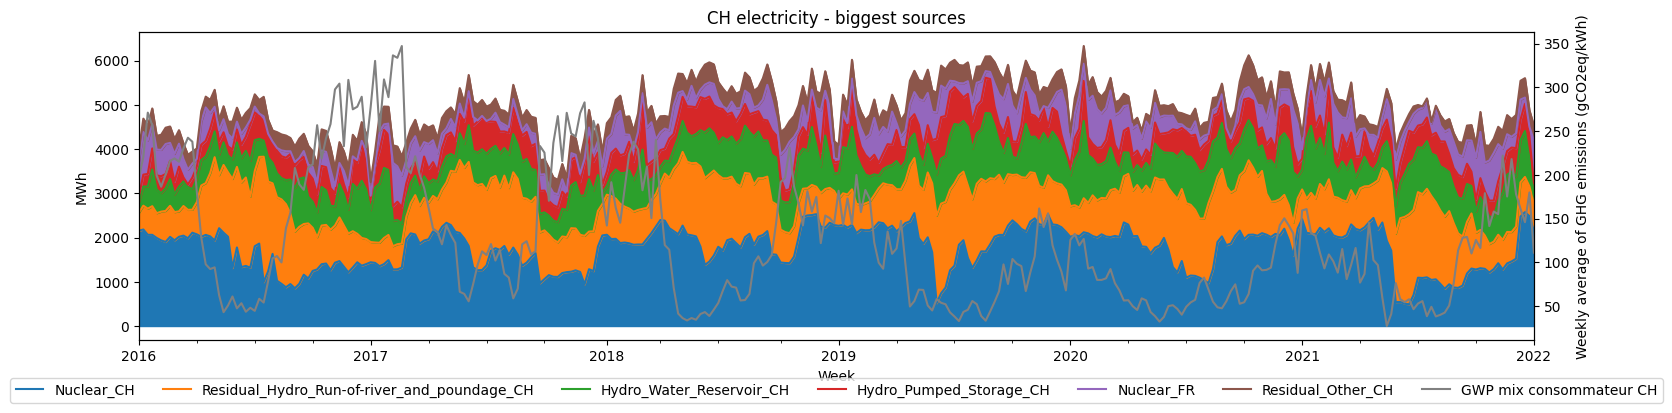

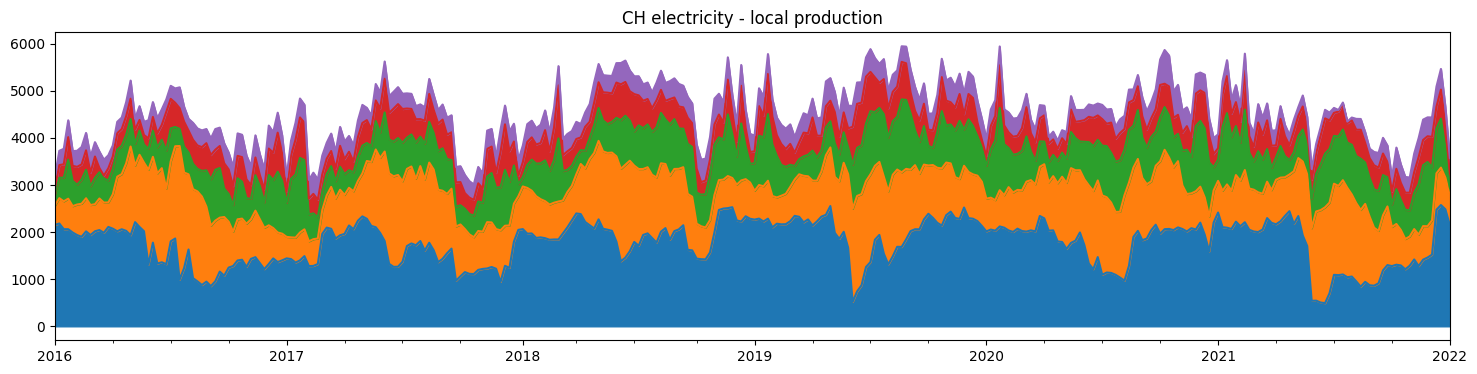

In [6]:
# local + import sources

fig, ax1 = plt.subplots(1, 1, figsize=(18, 4))
ax1.set_title('CH electricity - biggest sources')

df = raw_consumption_by_src['raw_df'].resample('W').mean()
local_cols = df.mean().nlargest(6).index.tolist()
df[local_cols].plot.area(ax=ax1, legend=False)
plt.xlabel('Week')
plt.ylabel('MWh')

ax2 = ax1.twinx()
ch_consumer_impact = (electricity_impact['df']['sum']).resample('W').mean()  # convert kgCO2eq/kWh -> gCO2eq/kWh
ch_consumer_impact.plot(ax=ax2, linestyle='-', color=[colormap['sum']])
ax2.set_ylabel('Weekly average of GHG emissions (gCO2eq/kWh)')

ax1.legend(np.concatenate([ax1.get_lines(), ax2.get_lines()]),
           np.concatenate([ax1.get_legend_handles_labels()[1], ['GWP mix consommateur CH']]),
           loc='upper center', ncol=7, bbox_to_anchor=(0.5, -0.1))

# local sources

fig, ax1 = plt.subplots(1, 1, figsize=(18, 4))
ax1.set_title('CH electricity - local production')

df = raw_consumption_by_src['raw_df'].resample('W').mean()
df = df.drop(df.loc[:, [not k.endswith('CH') or 'Mix' in k for k in df.columns]], axis=1)
local_cols = df.mean().nlargest(6).index.tolist()
df[local_cols].plot.area(ax=ax1, legend=False)
plt.xlabel('Week')
plt.ylabel('MWh')

ax2 = ax1.twinx()
producing_electricity_impact['CH'].resample('W').mean().plot(ax=ax2, linestyle='-', color=[colormap['sum']])
ax2.set_ylim([0, 40])
ax2.set_ylabel('gCO2eq/kWh')

ax1.legend(np.concatenate([ax1.get_lines(), ax2.get_lines()]),
           np.concatenate([ax1.get_legend_handles_labels()[1], ['GWP mix producteur CH']]),
           loc='upper center', ncol=7, bbox_to_anchor=(0.5, -0.1));

La part d'éolien semble peu varier mais la part de solaire augmente elle à partir de 2020. Attention cependant au fait qu'avant cette année, les données ENTSEO-E sont incomplètes (elles sont dans le résidu, non calculé ici).

Some mix emissions comparison with plot

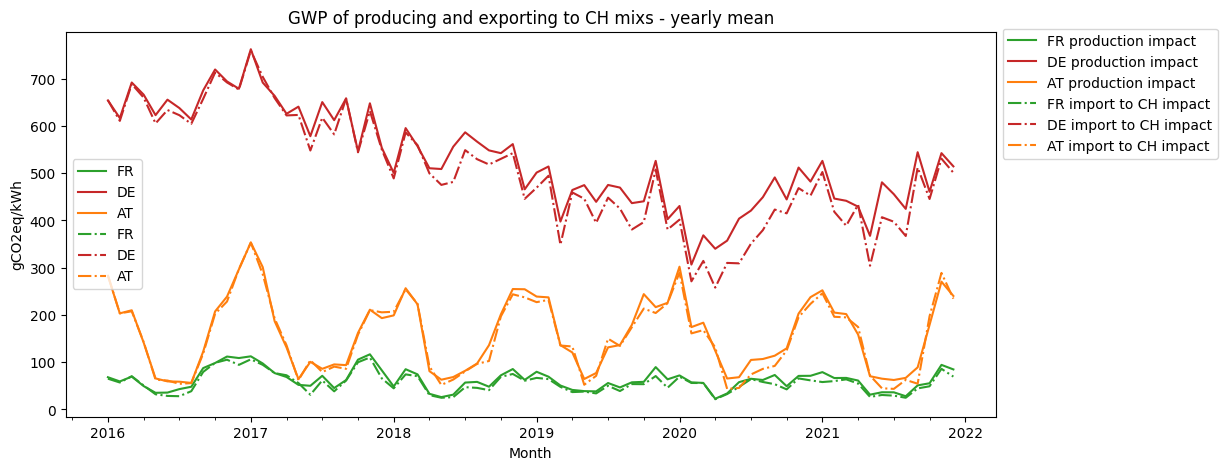

In [7]:
countries = ['FR', 'DE', 'AT']

table = {}
fig, ax = plt.subplots(figsize=(12, 5))
for c in countries:
    table[c + '_prod'] = producing_electricity_impacts[c].resample('M').mean()
    table[c + '_prod'].plot(style='-', legend=True, color=colormap[c])
for c in countries:
    emitted_co2 = producing_electricity_impacts[c].multiply(raw_consumptions_by_src['CH']['df'][c])
    emitted_co2 = emitted_co2.resample('M').sum() / raw_consumptions_by_src['CH']['df'][c].resample('M').sum()
    emitted_co2.plot(style='-.', legend=True, color=colormap[c])
    table[c + '_import'] = emitted_co2
ax.set_title('GWP of producing and exporting to CH mixs - yearly mean')
ax.set_xlabel('Month')
ax.set_ylabel('gCO2eq/kWh')
# Add margin on x axis
x0, x1 = plt.xlim()
plt.xlim(x0 - 0.05 * (x1 - x0), x1 + 0.05 * (x1 - x0))
fig.legend(
    np.concatenate([[f'{c} production impact' for c in countries], [f'{c} import to CH impact' for c in countries]]),
    loc='upper left', bbox_to_anchor=(0.9, 0.9));

### 1.2 Saisonalité :

Jours types :

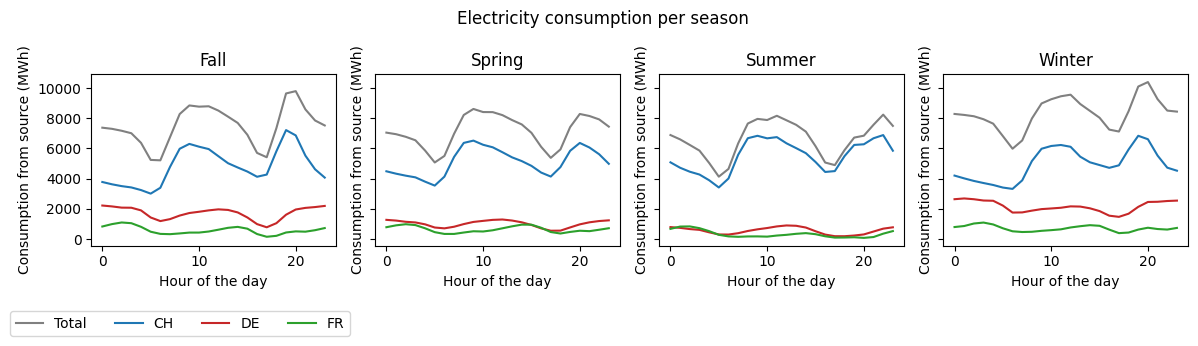

In [19]:
from etude_stat.analysis_functions import plot_typical_days

countries = ['sum', 'CH', 'DE', 'FR']
df = raw_consumption_by_src['df'][countries]

season_names = {2: 'Spring', 3: 'Summer', 4: 'Fall', 1: 'Winter'}
data = df.copy()
data['Season'] = [date.month % 12 // 3 + 1 for date in data.index]
data['Season'] = data['Season'].map(season_names)
grouped_data = data.groupby('Season')

season_labels = [*grouped_data.groups.keys()]
fig, ax = plt.subplots(1, len(season_labels), sharey=True, figsize=(12, 3))
for i in range(4):
    seasonal_data = [grouped_data.get_group(season)[data.columns[i]] for season in grouped_data.groups]
    plot_typical_days(seasonal_data, season_labels, 'Electricity consumption', 'Consumption from source (MWh)', fig=fig,
                      ax=ax)
for i in range(len(season_labels)):
    for j in range(len(ax[i].get_lines())):
        ax[i].get_lines()[j].set_color(colormap[countries[j]])
fig.legend(['Total', 'CH', 'DE', 'FR'], loc='upper left', ncol=4, bbox_to_anchor=(0, 0));

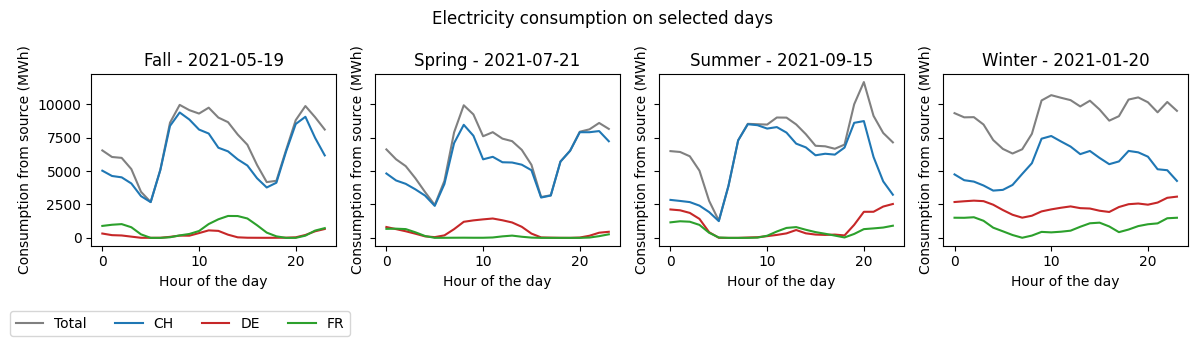

In [20]:
dates = ['2021-05-19', '2021-07-21', '2021-09-15', '2021-01-20']
fig, ax = plt.subplots(1, len(dates), sharey=True, figsize=(12, 3))
#for j in range(4):
for i in range(len(dates)):
    a = ax[i]
    by_hour = df.loc[pd.date_range(dates[i] + ' 00:00', dates[i] + ' 23:59', freq='H')]
    by_hour.index = by_hour.index.hour
    a.plot(by_hour)
    a.set_title(f'{season_labels[i]} - {dates[i]}')
    a.set_xlabel('Hour of the day')
    a.set_ylabel('Consumption from source (MWh)')
fig.suptitle(f'{"Electricity consumption"} on selected days')
fig.tight_layout()
for i in range(len(dates)):
    for j in range(len(ax[i].get_lines())):
        ax[i].get_lines()[j].set_color(colormap[countries[j]])
fig.legend(['Total', 'CH', 'DE', 'FR'], loc='upper left', ncol=4, bbox_to_anchor=(0, 0));

Heatmap du carbonne

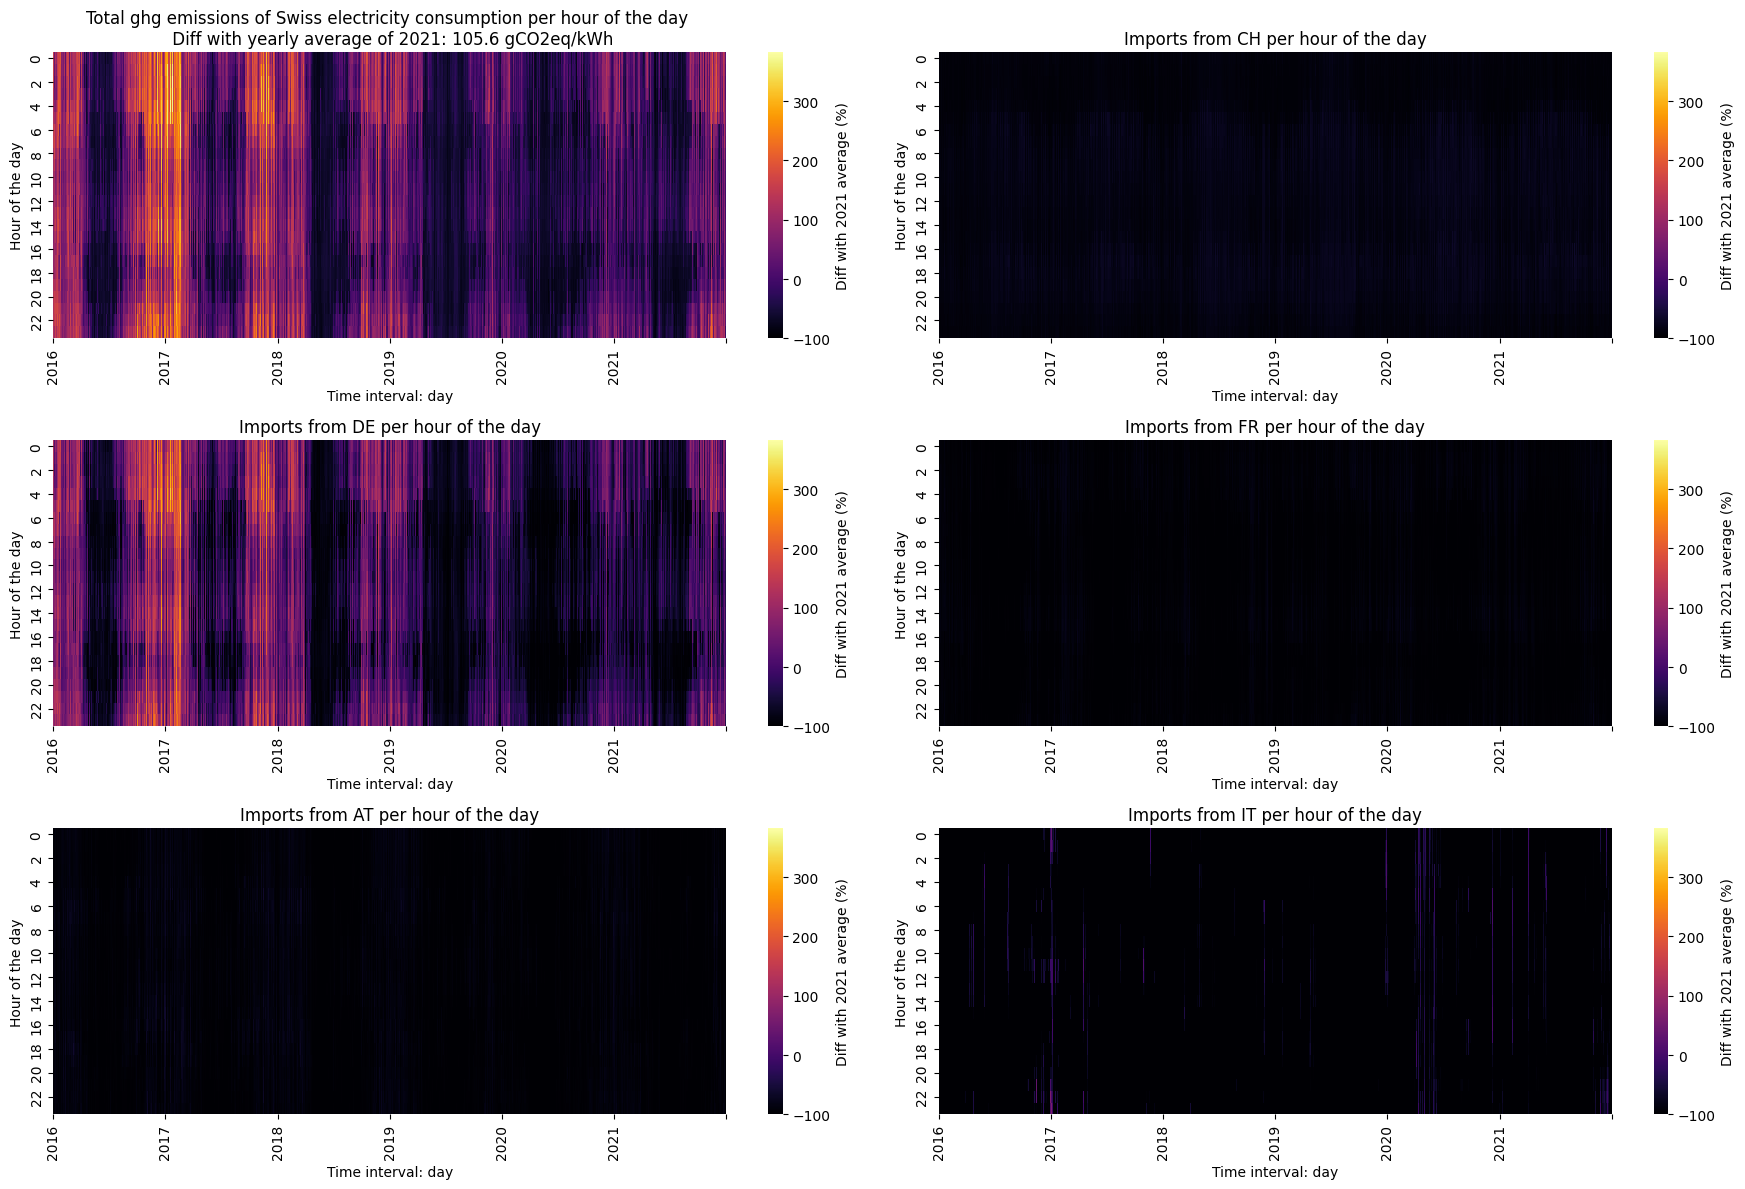

In [21]:
countries = ['sum', 'CH', 'DE', 'FR', 'AT', 'IT']

fig, ax = plt.subplots(3, 2, figsize=(18, 12))
# Heatmap import
data = electricity_impact['df'][countries].copy()
val_mean = data[countries]['sum'].loc['2021-01-01':'2021-12-31'].mean()
data = (data - val_mean) / val_mean * 100
val_min = data[countries].min().min()
val_max = data[countries].max().max()
for i in range(len(countries)):
    series = data[countries[i]]
    xlabels = list(series.resample('Y').mean().index.map(lambda x: x.year).values)
    axi = ax[i // 2, i % 2]
    plot_hourly_heatmap(data, countries[i], xlabels, 'Imports from ' + countries[i], 'Diff with 2021 average (%)',
                        val_min=val_min, val_max=val_max, fig=fig, ax=axi, cmap='inferno')

ax[0, 0].set_title(
    'Total ghg emissions of Swiss electricity consumption per hour of the day \n Diff with yearly average of 2021: ' + str(
        round(val_mean, 2)) + ' gCO2eq/kWh')
fig.tight_layout()

Bidouilles sur l'hydro :

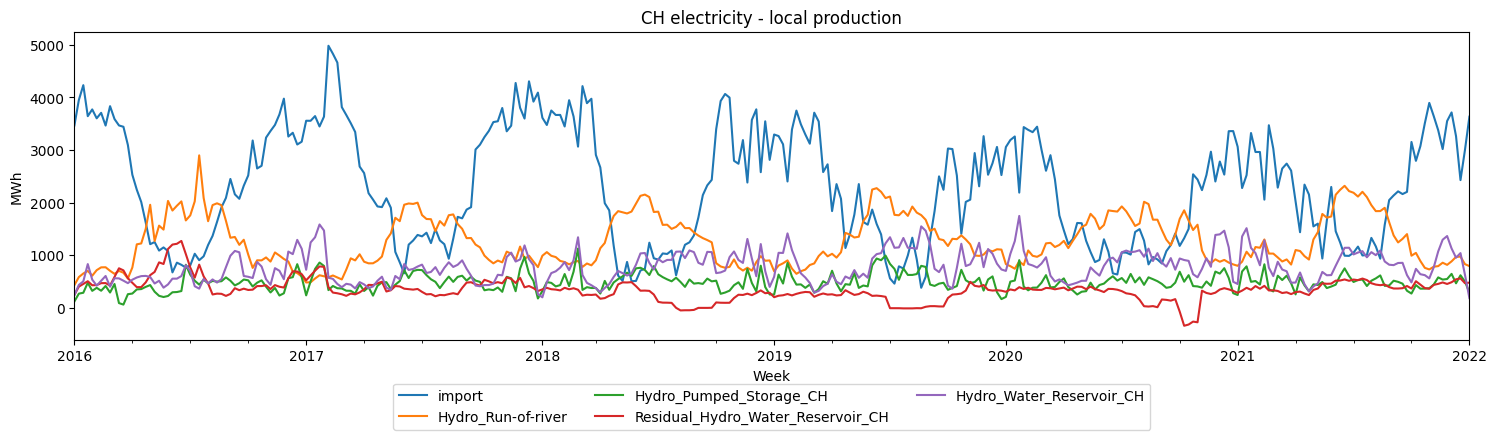

In [22]:
fig, ax1 = plt.subplots(1, 1, figsize=(18, 4))
ax1.set_title('CH electricity - local production')

df = raw_consumption_by_src['raw_df'].resample('W').mean()
df = df.drop(df.loc[:, [not k.endswith('CH') or 'Mix' in k for k in df.columns]], axis=1)
#local_cols = df.mean().nlargest(6).index.tolist()
local_cols = ['Residual_Hydro_Run-of-river_and_poundage_CH', 'Hydro_Run-of-river_and_poundage_CH']
df['Hydro_Run-of-river'] = df[local_cols].sum(axis=1)
df['import'] = (raw_consumption_by_src['df']['sum'] - raw_consumption_by_src['df']['CH']).resample('W').mean()
df[['import', 'Hydro_Run-of-river', 'Hydro_Pumped_Storage_CH', 'Residual_Hydro_Water_Reservoir_CH',
    'Hydro_Water_Reservoir_CH']].plot(ax=ax1, legend=False)
plt.xlabel('Week')
plt.ylabel('MWh')

ax1.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.12));

A part montrer que y'a pas de nucléaire en été, peu d'intérêt en plus :

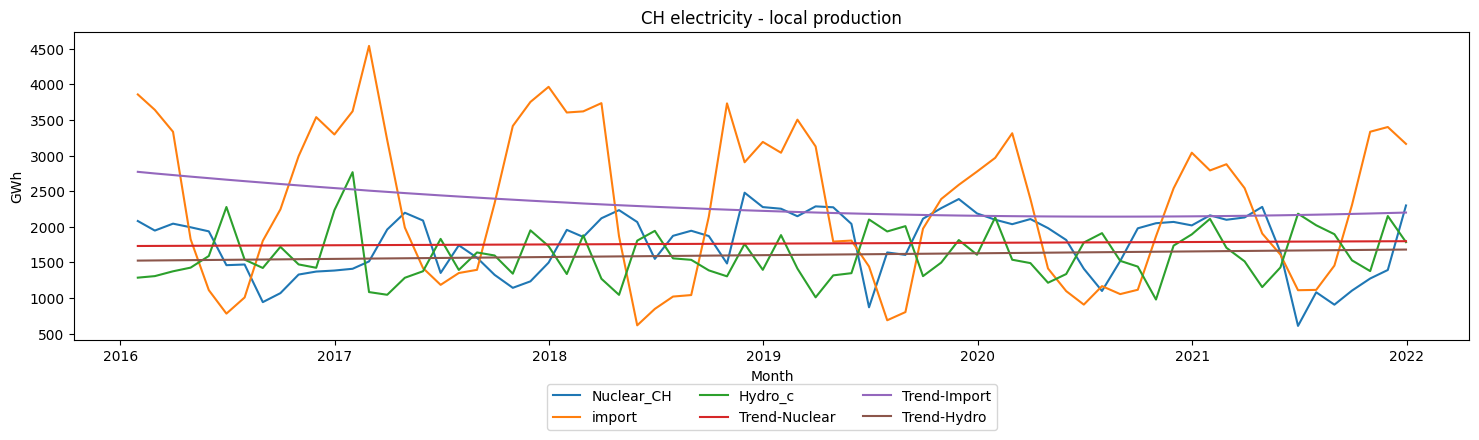

In [23]:
from etude_stat.analysis_functions import plot_trend

fig, ax1 = plt.subplots(1, 1, figsize=(18, 4))
ax1.set_title('CH electricity - local production')

df = raw_consumption_by_src['raw_df'].resample('M').mean()
df = df.drop(df.loc[:, [not k.endswith('CH') or 'Mix' in k for k in df.columns]], axis=1)
#local_cols = df.mean().nlargest(6).index.tolist()
local_cols = ['Residual_Hydro_Water_Reservoir_CH', 'Hydro_Pumped_Storage_CH', 'Hydro_Water_Reservoir_CH']
df['Hydro_c'] = df[local_cols].sum(axis=1)
df['import'] = (raw_consumption_by_src['df']['sum'] - raw_consumption_by_src['df']['CH']).resample('M').mean()
cols = ['Nuclear_CH', 'import', 'Hydro_c']
for col in cols:
    ax1.plot(df.index, df[col], label=col)
plot_trend(ax=ax1, df=df, y=df['Nuclear_CH'], degree=1, label='Trend-Nuclear')
plot_trend(ax=ax1, df=df, y=df['import'], degree=2, label='Trend-Import')
plot_trend(ax=ax1, df=df, y=df['Hydro_c'], degree=1, label='Trend-Hydro')
plt.xlabel('Month')
plt.ylabel('GWh')

ax1.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.12));

### 1.3 Impact carbone

Impact carbone d'un kWh Suisse (moyenne sur une semaine pendant les 5 ans de l'étude)

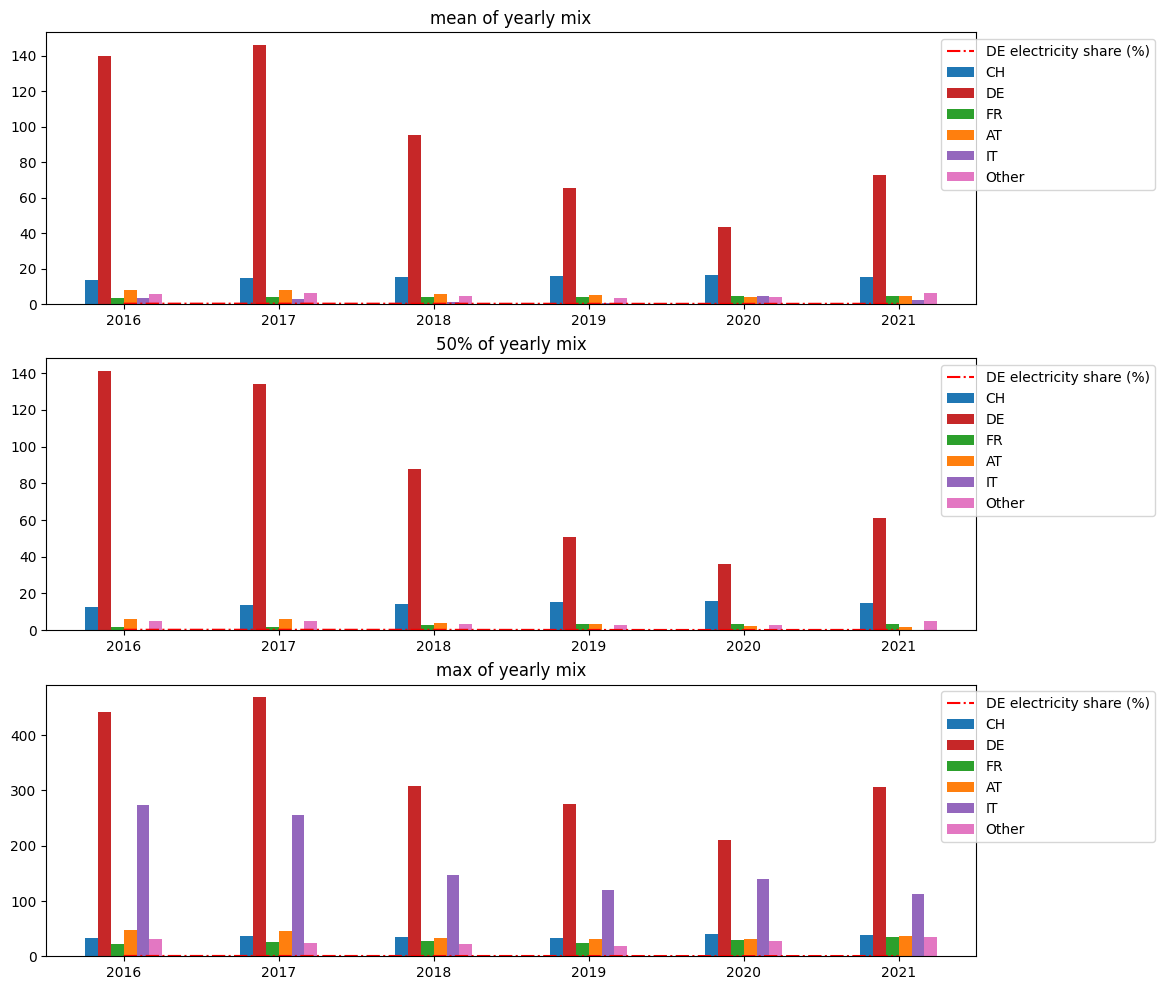

In [24]:
from etude_stat.analysis_functions import plot_metrics

metrics = ['mean', '50%', 'max']  # Metrics to plot # '50%',
fig, ax = plt.subplots(len(metrics), 1, figsize=(12, 4 * len(metrics)))
plot_metrics(years, electricity_impact['df'][ordered_countries], 'yearly carbon impact', metrics, 'Y', ax=ax,
             linestyle='bar', color=ordered_colors)
plot_metrics(years, electricity_mix['df']['DE'], 'yearly mix', metrics, 'Y', ax=ax, linestyle='-.',
             label=["DE electricity share (%)"], color='red')

DE electricity is between 10 and 40% (mean 20%) of the Swiss electrical mix, but forms the majority of the carbon impact (between 60 and 90% of the total, mean 80%).

On affiche à gauche la production locale pilotable et les imports à partir de chaque pays en fonction de la consommation résiduelle (consommation totale - production locale des sources non pilotables).
On affiche à droite la production locale des sources pilotables en fonction de la consommation résiduelle.

In [25]:
fatal_sources = ['Solar', 'Waste', 'Wind_Offshore', 'Wind_Onshore', 'Hydro_Run-of-river_and_poundage', 'Marine',
                 'Other_renewable']

Production per source against residual demand

KeyError: "['Hydro_Run-of-river_and_poundage_AT', 'Marine_AT', 'Other_renewable_AT', 'Solar_AT', 'Waste_AT', 'Wind_Offshore_AT', 'Wind_Onshore_AT', 'Hydro_Run-of-river_and_poundage_DE', 'Marine_DE', 'Other_renewable_DE', 'Solar_DE', 'Waste_DE', 'Wind_Offshore_DE', 'Wind_Onshore_DE', 'Hydro_Run-of-river_and_poundage_FR', 'Marine_FR', 'Other_renewable_FR', 'Solar_FR', 'Waste_FR', 'Wind_Offshore_FR', 'Wind_Onshore_FR', 'Hydro_Run-of-river_and_poundage_IT', 'Marine_IT', 'Other_renewable_IT', 'Solar_IT', 'Waste_IT', 'Wind_Offshore_IT', 'Wind_Onshore_IT'] not found in axis"

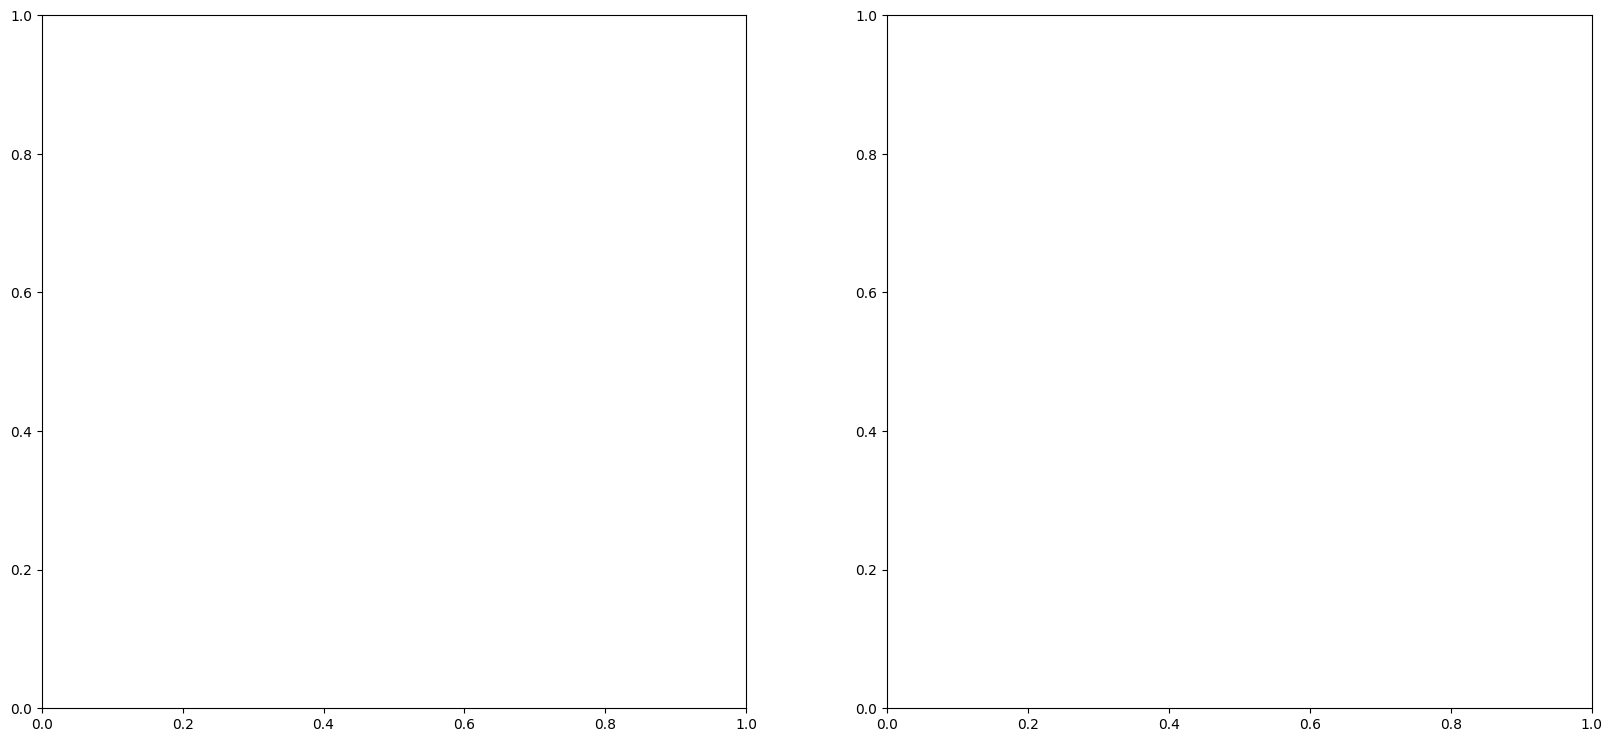

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(20, 9), sharey=False)
prod_per_source = raw_consumption_by_src['raw_df'].resample('H').mean()
prod_per_source_local = prod_per_source.drop(
    prod_per_source.loc[:, [not k.endswith('CH') or 'Mix' in k for k in prod_per_source.columns]], axis=1)
prod_per_source['Mix_CH_CH'] = prod_per_source_local.sum(axis=1)
prod_per_source['total'] = raw_consumption_by_src['df']['sum'].resample('H').mean()

# Subtracting the fatal power
fatal_power = prod_per_source.drop(
    prod_per_source.loc[:, [not k[:-3] in fatal_sources for k in prod_per_source.columns]], axis=1)
prod_per_source_local = prod_per_source_local.drop(fatal_power.columns, axis=1)
fatal_power = fatal_power.sum(axis=1)
prod_per_source['total'] = prod_per_source['total'] - fatal_power

# Import sources
ax[0].set_title("Production per source against residual demand - import sources")
columns = list(map(lambda x: 'Mix_' + x + '_CH', ordered_countries))
for i in range(len(columns)):
    prod_per_source.plot.scatter(x='total', y=columns[i], ax=ax[0], c=colormap[ordered_countries[i]], label=columns[i],
                                 s=0.2)
ax[0].set_xlabel('Residual demand (MWh)')
ax[0].set_ylabel('Production (MWh)')

# Local sources
ax[1].set_title("Production per source against residual demand - CH  controllable sources")
columns = prod_per_source_local.mean().nlargest(3).index.tolist()  # Limit to 3 to remove zero values
#columns.append('Mix_DE_CH')

all_import = raw_consumption_by_src['raw_df'].resample('H').mean()
all_import = all_import.drop(all_import.loc[:, [not k.startswith('Mix') for k in all_import.columns]], axis=1).sum(
    axis=1)
prod_per_source['import'] = all_import
columns.append('import')

colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']
for i in range(len(columns)):
    prod_per_source.plot.scatter(x='total', y=columns[i], ax=ax[1], c=colors[i], label=columns[i], s=.2)
ax[1].set_xlabel('Residual demand (MWh)')
ax[1].set_ylabel('Production (MWh)');

Carbon impact per source against source production

KeyError: 'Mix_IT_CH'

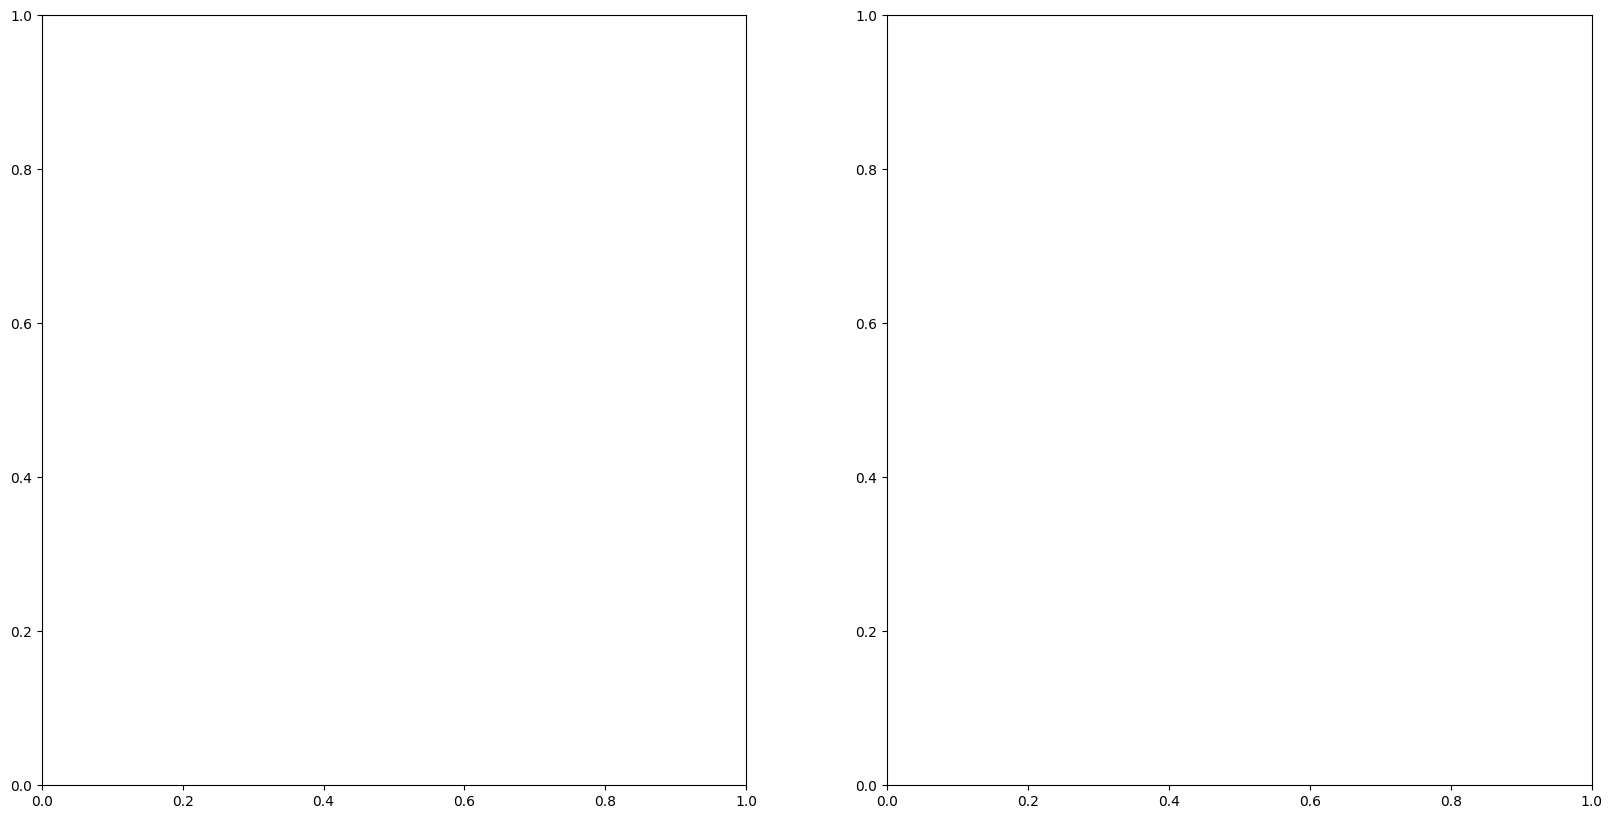

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10), sharey=False)
columns = list(map(lambda x: 'Mix_' + x + '_CH', ordered_countries))

prod_per_source = raw_consumption_by_src['raw_df'].resample('H').mean()
prod_per_source_local = prod_per_source.drop(
    prod_per_source.loc[:, [not k.endswith('CH') or 'Mix' in k for k in prod_per_source.columns]], axis=1)
prod_per_source['Mix_CH_CH'] = prod_per_source_local.sum(axis=1)
prod_per_source['total'] = raw_consumption_by_src['df']['sum'].resample('H').mean()

#d_carbon = electricity_impact['df'].drop(['sum'], axis=1).resample('W').mean()
d_carbon = producing_electricity_impact.drop(['sum'], axis=1).resample('H').mean()
d_carbon.columns = list(map(lambda x: 'Mix_' + x + '_CH', d_carbon.columns))
df_local_carbon = electricity_impact['raw_df'][prod_per_source_local.columns].resample('H').mean()
#d_carbon['Mix_CH_CH'] = df_local_carbon.sum(axis=1)

df = prod_per_source.copy()
for col in columns:
    df[col + '_carbon'] = d_carbon[col]  # convert to kgCO2eq
for col in prod_per_source_local.columns:
    df[col + '_carbon'] = df_local_carbon[col]  # convert to kgCO2eq

ax[0].set_title("Carbon impact per source against source production - import sources")
for i in range(len(columns)):
    df.plot.scatter(x=columns[i], y=columns[i] + '_carbon', ax=ax[0], c=colormap[ordered_countries[i]],
                    label=columns[i])
ax[0].set_xlabel('Production/Import (MWh)')
ax[0].set_ylabel('Carbon impact (kgCO2eq)')

local_cols = prod_per_source_local.mean().nlargest(8).index.tolist()
ax[1].set_title("Carbon impact per source against source production - CH sources")
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']
for i in range(len(local_cols)):
    df.plot.scatter(x=local_cols[i], y=local_cols[i] + '_carbon', ax=ax[1], c=colors[i], label=local_cols[i])
ax[1].set_xlabel('Production (MWh)')
ax[1].set_ylabel('Carbon impact (kgCO2eq)');

### 3. Analysis of the GWP impact

Impact of production mix vs impact of consumption mix

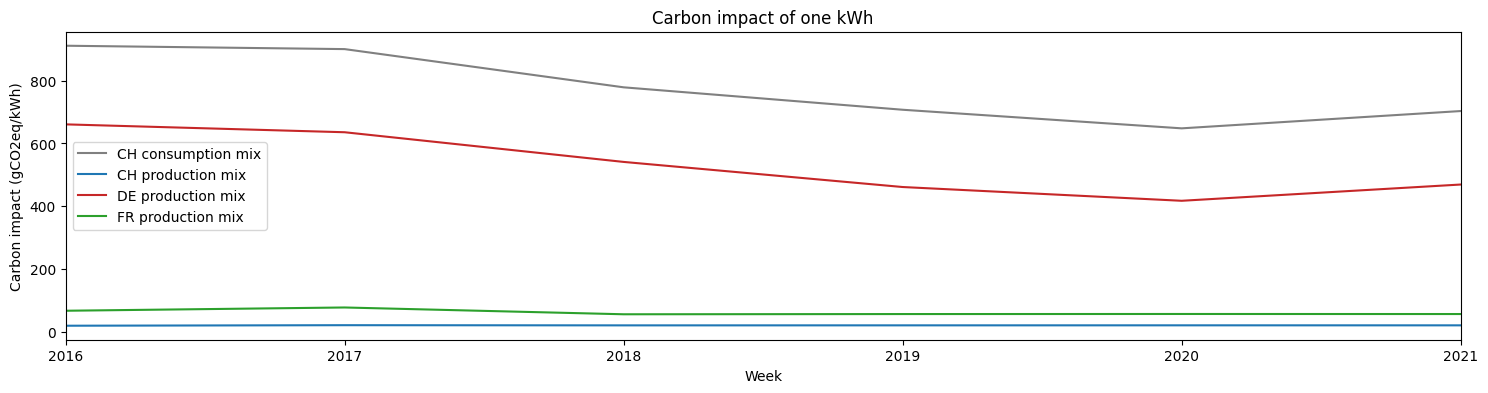

In [29]:
to_plot = ['sum', 'CH', 'DE', 'FR']
fig, ax = plt.subplots(1, 1, figsize=(18, 4))
ax.set_title("Carbon impact of one kWh")
producing_electricity_impact[to_plot].resample('Y').mean().plot(ax=ax, color=[colormap[c] for c in to_plot])
ax.legend(['CH consumption mix', 'CH production mix', 'DE production mix', 'FR production mix'])
ax.set_xlabel('Week')
ax.set_ylabel('Carbon impact (gCO2eq/kWh)');

Comparaison des impacts producteurs selon la méthode de calcul :

In [30]:
def get_gwp_in_date_range(year_start, year_end, study_start, study_end, country):
    prod_impact = producing_electricity_impacts[country].loc[year_start:year_end]
    prod_impact_yearly = prod_impact.mean()
    prod = raw_consumptions_by_src[country]['df'].loc[study_start:study_end][country]
    total_prod = prod.sum()
    emitted_avg = prod * prod_impact_yearly  # in kgCO2eq (prod is MWh, prod_impact is gCO2eq/kWh)
    emitted_hourly = prod.multiply(prod_impact)  # in kgCO2eq (prod is MWh, prod_impact is gCO2eq/kWh)
    return (prod_impact_yearly, total_prod, emitted_avg, emitted_hourly,
            prod_impact)  # (yearly impact kgCO2eq/MWh, total_prod MWh, total emissions kgCO2eq/hour avg, total emissions kgCO2eq/hour hourly, hourly impact kgCO2eq/MWh)

-----CH-----
Total production in period: 45007098.56 MWh
Total emissions in period (avg estimate): 967263568.25 tCO2eq. 21.49 kgCO2eq/MWh
Total emissions in period (hourly estimate): 988994833.56 tCO2eq. 21.97 kgCO2eq/MWh
-----FR-----
Total production in period: 482064965.77 MWh
Total emissions in period (avg estimate): 27690932213.32 tCO2eq. 57.44 kgCO2eq/MWh
Total emissions in period (hourly estimate): 29197593037.26 tCO2eq. 60.57 kgCO2eq/MWh
-----DE-----
Total production in period: 476633930.93 MWh
Total emissions in period (avg estimate): 223708601384.17 tCO2eq. 469.35 kgCO2eq/MWh
Total emissions in period (hourly estimate): 220912727172.66 tCO2eq. 463.49 kgCO2eq/MWh


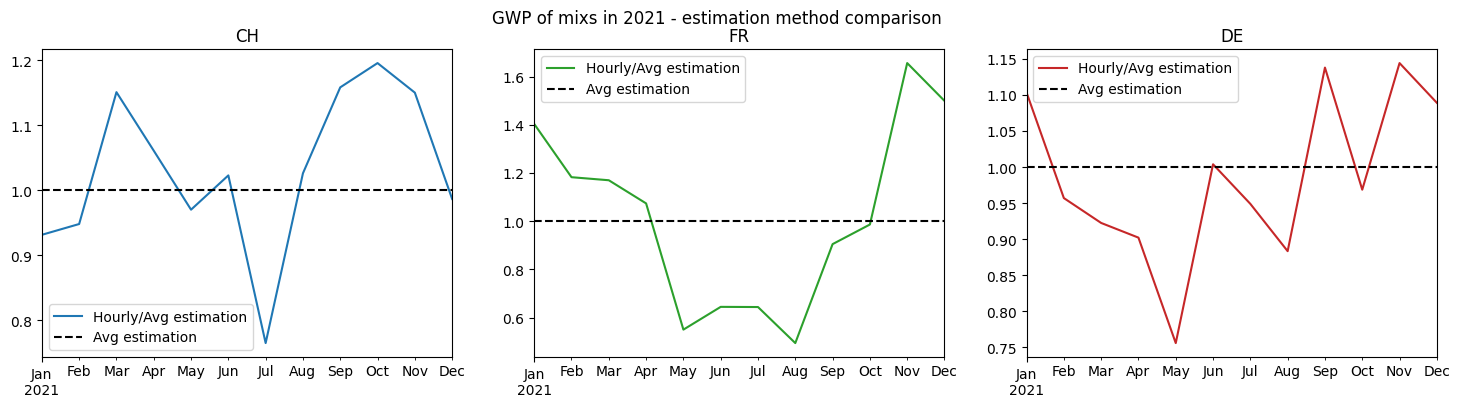

In [31]:
y_start = '2021-01-01 00:00'
y_end = '2021-12-31 23:59'
start = '2021-01-01 00:00'
end = '2021-12-31 23:59'
countries = ['CH', 'FR', 'DE']

fig, ax = plt.subplots(1, 3, figsize=(18, 4))
for i in range(len(countries)):
    c = countries[i]
    (prod_impact_yearly, total_prod, emitted_avg, emitted_hourly, impact_hourly) = get_gwp_in_date_range(y_start, y_end,
                                                                                                         start, end, c)
    print('-----' + c + '-----')
    #print(f'GWP of mix in 2021: {prod_impact_yearly:.2f} gCO2eq/kWh')
    print(f'Total production in period: {total_prod:.2f} MWh')
    print(
        f'Total emissions in period (avg estimate): {emitted_avg.sum():.2f} tCO2eq. {emitted_avg.sum() / total_prod:.2f} kgCO2eq/MWh')
    print(
        f'Total emissions in period (hourly estimate): {emitted_hourly.sum():.2f} tCO2eq. {emitted_hourly.sum() / total_prod:.2f} kgCO2eq/MWh')

    #emitted_avg.resample('M').mean().plot(color=colormap[c], ax=ax[i], linestyle='--')
    #emitted_hourly.resample('M').mean().plot(color=colormap[c], ax=ax[i])
    #ax[i].axhline(y=prod_impact_yearly, color=colormap[c], )
    #ax[i].legend([f'{c} hourly emissions - ', f'{c} emissions - avg on year'])
    # if c == 'DE':
    #     ax[i].set_ylim(350, 550)
    # else:
    #     ax[i].set_ylim(0, 200)

    # ax[i].scatter(emitted_avg.resample('M').mean()/1000, emitted_hourly.resample('M').mean()/1000, color=colormap[c], marker='o')
    # ax[i].set_xlabel('Total emissions (avg estimate) (tCO2eq/month)')
    # ax[i].set_ylabel('Total emissions (hourly estimate) (tCO2eq/month)')
    # ax[i].legend([f'{c}'])

    ratio = emitted_hourly.resample('M').mean().divide(emitted_avg.resample('M').mean())
    ratio.plot(color=colormap[c], ax=ax[i])
    ax[i].axhline(y=1, color='black', linestyle='--')
    ax[i].set_title(f'{c}')
    ax[i].legend([f'Hourly/Avg estimation', 'Avg estimation'])
fig.suptitle('GWP of mixs in 2021 - estimation method comparison');
plt.show()

Plot of GWP impact of production and consumption mixs VS renewable production share for each country

In [32]:
fossil_sources = ['Fossil_Brown_coal/Lignite',
                  'Fossil_Coal-derived_gas',
                  'Fossil_Gas',
                  'Fossil_Hard_coal',
                  'Fossil_Oil',
                  'Fossil_Oil_shale',
                  'Fossil_Peat',
                  'Other_fossil']

In [33]:
fossil_shares = {c: (electricity_mixs[c]['raw_df'][[f'{src}_{c}' for src in fossil_sources]]
                     .sum(axis=1) / electricity_mixs[c]['df'][c]).mean(axis=0) for c in my_config.target}
fossil_shares

{'CH': 0.0,
 'AT': 0.17683525549147144,
 'FR': 0.07819144101522449,
 'DE': 0.44603224559878946}

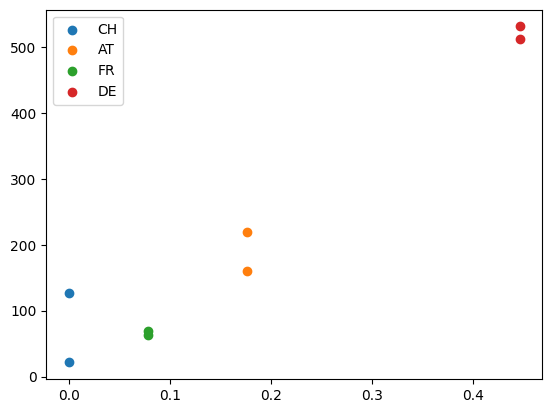

In [34]:
for c in my_config.target:
    plt.scatter([fossil_shares[c], fossil_shares[c]],
                [producing_electricity_impacts[c].mean(axis=0),
                 electricity_impacts[c]['df']['sum'].mean(axis=0)], label=c)
plt.legend();

Analysis of the Germany's mix

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.linspace(0, 1, 100)
c = 'DE'
mx = raw_productions_by_src[c]['df']['sum'].resample('D').sum().map(lambda x: x / 1000)
px = producing_electricity_impacts[c]['df']['sum'].resample('D').mean()
mx = mx.loc['2021':'2022']
px = px.loc['2021':'2022']
months = mx.index.month
#plt.plot(mx, px, color=list(colormap.values()), label=c, marker='x', linestyle='None')
scatter = plt.scatter(mx, px, c=months, cmap='coolwarm', label=c, marker='x')
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
legend_labels = {i: month_names for i, month_names in enumerate(month_names, 1)}
handles = [plt.Line2D([0], [0], marker='X', color='w', label=legend_labels[i], markersize=10,
                       markerfacecolor=scatter.cmap(scatter.norm(i))) for i in range(1, 13)]
plt.legend(handles=handles, title='Month', loc='best')
plt.title('Carbon impact of the electricity produced in Germany 2021-2022 - daily avg')
plt.xlabel('Produced electricity (GWh)')
plt.ylabel('GWP (gCO2eq/kWh)');
#plt.legend();